In [ ]:
!pip install mplcyberpunk
!pip install python-bcb

In [ ]:
import mplcyberpunk
import seaborn as sns
import pandas as pd
from bcb import sgs
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from datetime import datetime
from datetime import timedelta

plt.style.use("cyberpunk")

In [ ]:
import numpy as np
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

In [ ]:
df_federal = pd.read_csv('/content/drive/MyDrive/Dados/convenio_FEDERAL.csv', sep=';')
df_federal['Data'] = pd.to_datetime(df_federal['Data'], format='%d/%m/%Y')

In [ ]:
df_federal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Data                    31 non-null     datetime64[ns]
 1   ValorBase               31 non-null     object        
 2   Selic                   31 non-null     object        
 3   taxa_mensal_consignado  31 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.1+ KB


In [ ]:
# Remover vírgula e converter coluna para float
df_federal['ValorBase'] = df_federal['ValorBase'].str.replace(',', '.').astype(float)
df_federal['Selic'] = df_federal['Selic'].str.replace(',', '.').astype(float)
df_federal['taxa_mensal_consignado'] = df_federal['taxa_mensal_consignado'].str.replace(',', '.').astype(float)

In [ ]:
df_federal.head(5)

,Data,ValorBase,Selic,taxa_mensal_consignado
0,2020-12-01,4000.0,2.00,1.24
1,2021-01-01,729109.0,2.00,1.26
2,2021-02-01,888892.0,2.00,1.26
3,2021-03-01,1791860.0,2.00,1.27
4,2021-04-01,2419661.0,2.75,1.30


In [ ]:
df_federal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Data                    31 non-null     datetime64[ns]
 1   ValorBase               31 non-null     float64       
 2   Selic                   31 non-null     float64       
 3   taxa_mensal_consignado  31 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.1 KB


# **CORRELAÇÃO**

In [ ]:
df_federal.corr()

,ValorBase,Selic,taxa_mensal_consignado
ValorBase,1.000000,0.311088,0.306177
Selic,0.311088,1.000000,0.969828
taxa_mensal_consignado,0.306177,0.969828,1.000000


<Figure size 1000x600 with 0 Axes>

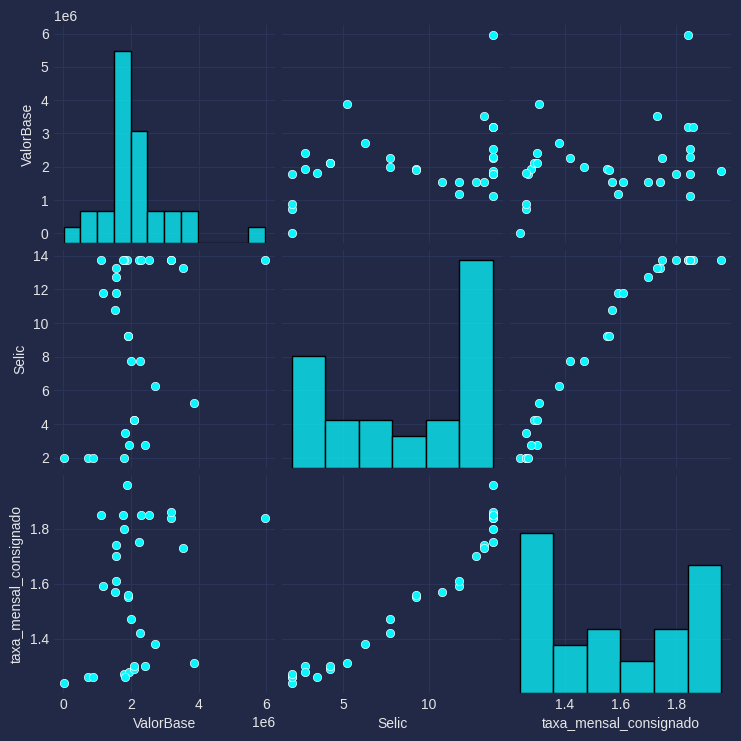

In [ ]:
sns.pairplot(df_federal)

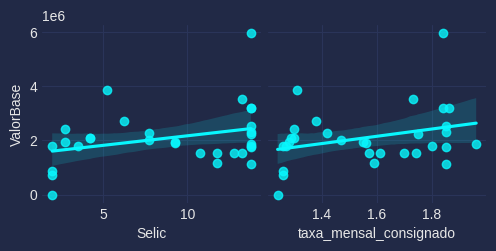

In [ ]:
ax = sns.pairplot(df_federal, y_vars='ValorBase', x_vars=['Selic', 'taxa_mensal_consignado'], kind='reg')
ax.fig.suptitle('', fontsize=20, y=1.07)
ax

# MODELO AUTOREG GOVERNO TREINO/TESTE

In [ ]:
train_size = int(len(df_federal.ValorBase) * 2 / 3)
train_size

20

In [ ]:
train_set = df_federal.ValorBase[:train_size]
test_set = df_federal.ValorBase[train_size:]

In [ ]:
train_set.shape, test_set.shape

((20,), (11,))

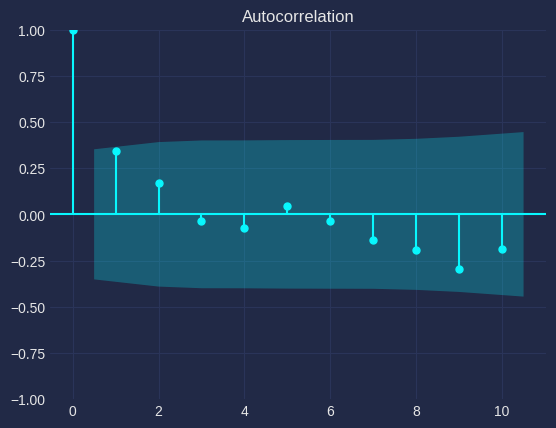

In [ ]:
plot_acf(df_federal.ValorBase, lags=10)
pyplot.show()

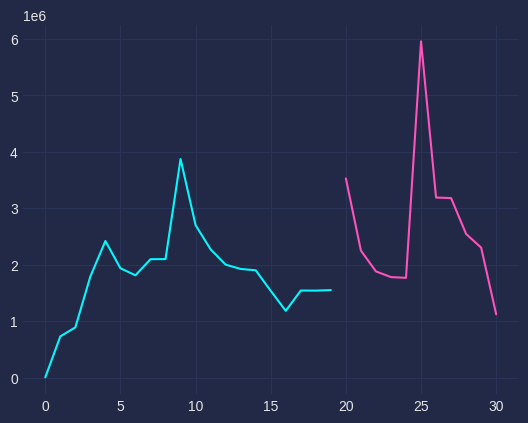

In [ ]:
plt.plot(train_set)
plt.plot(test_set)

In [ ]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import AutoReg

ar_2 = AutoReg(train_set, lags=2).fit()
ar_2.params

const           953956.501807
ValorBase.L1         0.516659
ValorBase.L2         0.006203
dtype: float64

In [ ]:
previsoes = ar_2.params[0] + test_set.shift(1) * ar_2.params[1] + test_set.shift(2) * ar_2.params[2]

In [ ]:
((test_set - previsoes) ** 2).mean()

2095238637066.0417

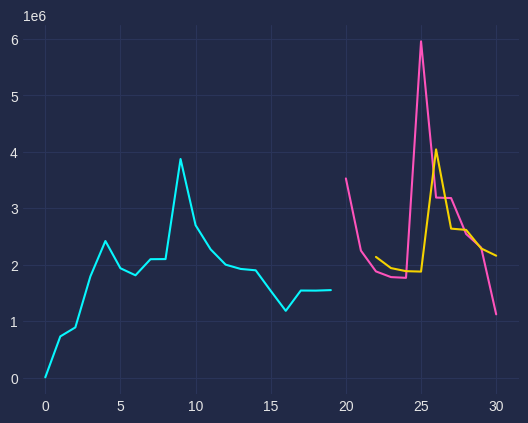

In [ ]:
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsoes)

# MODELO ECONOMETRICO

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
modelo2 = smf.ols(data = df_federal, formula = 'ValorBase ~ Selic + taxa_mensal_consignado' )
modelo_ajustado = modelo2.fit()
print(modelo_ajustado.summary() )

                            OLS Regression Results                            
Dep. Variable:              ValorBase   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1.506
Date:                Fri, 23 Jun 2023   Prob (F-statistic):              0.239
Time:                        19:12:49   Log-Likelihood:                -472.34
No. Observations:                  31   AIC:                             950.7
Df Residuals:                      28   BIC:                             955.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.09

In [ ]:
df_federal

# PREVISÕES SARIMAX CONVENIO FEDERAL


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Converter coluna de datas para o tipo datetime
df_federal['Data'] = pd.to_datetime(df_federal['Data'])

# Definir a coluna 'Data' como o índice do DataFrame
df_federal.set_index('Data', inplace=True)

# Verificar o índice atualizado


In [ ]:
df_federal.head(5)

,ValorBase,Selic,taxa_mensal_consignado
Data,,,
2020-12-01,4000.0,2.00,1.24
2021-01-01,729109.0,2.00,1.26
2021-02-01,888892.0,2.00,1.26
2021-03-01,1791860.0,2.00,1.27
2021-04-01,2419661.0,2.75,1.30


In [ ]:
sarima = SARIMAX(df_federal.ValorBase, freq='MS', order=(1, 0, 0), seasonal_order=(1, 1, 1, 3)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
print((sarima.resid ** 2).mean())

1227515086354.3518


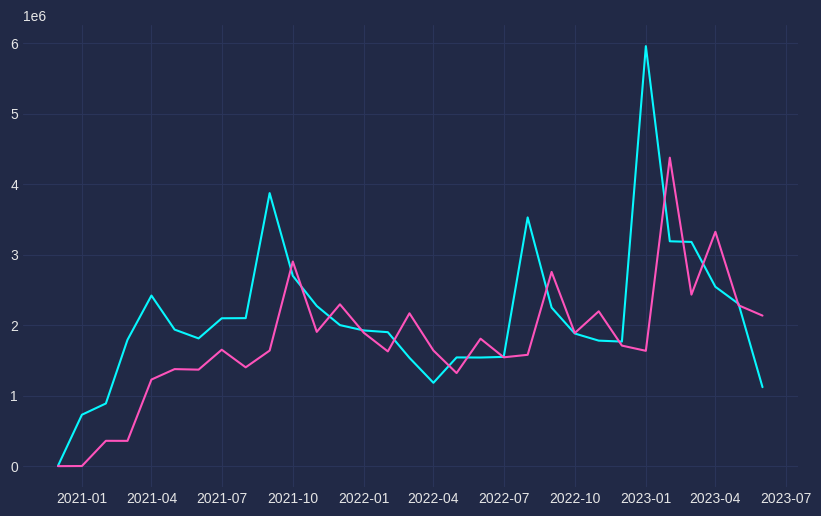

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_federal.ValorBase)
plt.plot(sarima.predict(typ='levels'))

In [ ]:
sarima.forecast().round()

2023-07-01    2347241.0
Freq: MS, dtype: float64

# PREVISÕES COM ARIMA CONVENIO FEDERAL

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(df_federal['ValorBase'], order=(2, 1, 2))
arima_fit = arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
# Calcular o quadrado dos resíduos médios
mse = (arima_fit.resid).mean()
print(mse)

262844.6297165012


**MEDIA MOVEL CALCULADA SOBRE AS ULTIMAS 10 OBSERVAÇÕES**

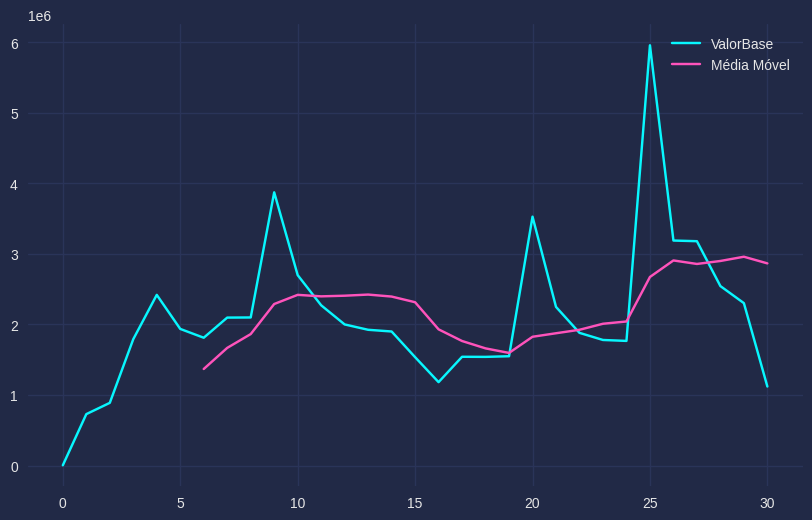

In [ ]:
df_federal['MediaMovel'] = df_federal['ValorBase'].rolling(window=10).mean()

# Plotando o gráfico original e a média móvel
plt.figure(figsize=(10, 6))
plt.plot(df_federal['ValorBase'], label='ValorBase')
plt.plot(df_federal['MediaMovel'], label='Média Móvel')
plt.legend()

# Exibindo o gráfico
plt.show()

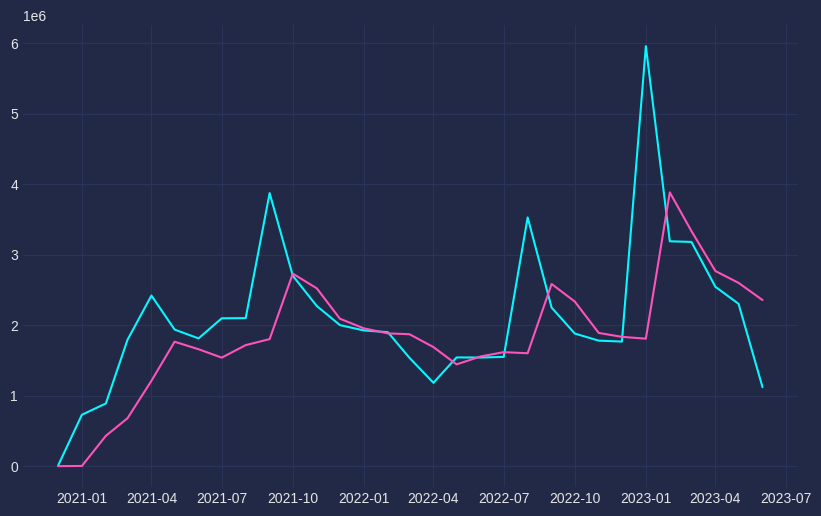

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_federal.ValorBase)
plt.plot(arima_fit.predict(typ='levels'))

In [ ]:
# RESULTADO ARIMA
previsão = (arima_fit.forecast(steps=6).round())
arima_fit.forecast(steps=6).round()

2023-07-01    1752956.0
2023-08-01    1832511.0
2023-09-01    1996537.0
2023-10-01    2048465.0
2023-11-01    2097357.0
2023-12-01    2119430.0
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
df_federal.tail(2)

,ValorBase,Selic,taxa_mensal_consignado
Data,,,
2023-05-01,2302571.91,13.75,1.85
2023-06-01,1120362.96,13.75,1.85


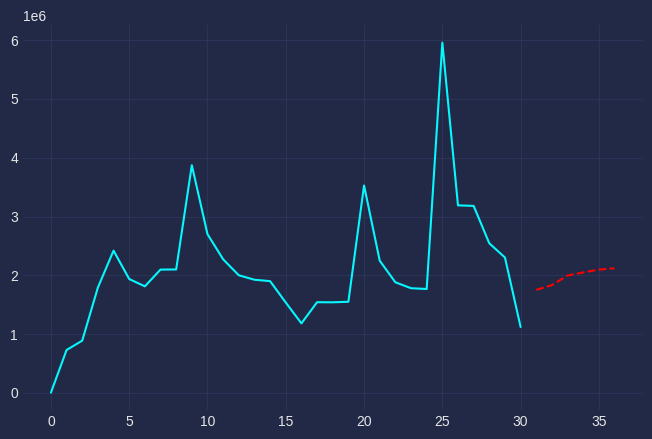

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(df_federal.ValorBase)
plt.plot(previsão, color='red', linestyle='--', label='Previsão')

# PREVISÕES COM PYCARET CONVENIO FEDERAL
# Aplicando modelos com variáveis exógenas

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.time_series import *

In [ ]:
plot_model(plot='diagnostics')

In [ ]:
setup(df_federal, target='ValorBase', fh=3, fold=3)

,Description,Value
0,session_id,7710
1,Target,ValorBase
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(31, 4)"
5,Transformed data shape,"(31, 4)"
6,Transformed train set shape,"(28, 4)"
7,Transformed test set shape,"(3, 4)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
melhor_modelo = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
grand_means,Grand Means Forecaster,2.1459,1.7582,1039299.3162,1239556.6411,0.2767,0.3579,-2.0049,0.0433
croston,Croston,2.2255,1.8431,1075497.4719,1293337.7717,0.2787,0.3751,-1.4102,0.0333
naive,Naive Forecaster,2.5116,2.0449,1227918.9389,1447759.3263,0.3567,0.4495,-26.3144,2.1867


Processing:   0%|          | 0/93 [00:00<?, ?it/s]

In [ ]:
#checandoo estatistica
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,31.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,2106550.300968
3,Summary,Statistics,Transformed,Median,,1924705.0
4,Summary,Statistics,Transformed,Standard Deviation,,1072443.45249
5,Summary,Statistics,Transformed,Variance,,1150134958787.785645
6,Summary,Statistics,Transformed,Kurtosis,,4.807612
7,Summary,Statistics,Transformed,Skewness,,1.502638
8,Summary,Statistics,Transformed,# Distinct Values,,31.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",32.53716


In [ ]:
modelo_naive = create_model('grand_means')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,18.0000,1.7884,1.6362,808347.3751,1039394.6166,0.2836,0.3396,-0.6097
1,21.0000,0.1482,0.1219,80486.2245,95250.7654,0.0453,0.0439,-2.4967
2,24.0000,4.5013,3.5163,2229064.3491,2584024.5411,0.5012,0.6903,-2.9083
Mean,nan,2.1459,1.7582,1039299.3162,1239556.6411,0.2767,0.3579,-2.0049
SD,nan,1.7950,1.3884,892226.0882,1025848.3818,0.1862,0.2642,1.0007


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Decomposição da Serie Historica
plot_model(modelo_naive, plot = 'decomp_stl')

Decomposition is currently not supported for pandas dataframes without a PeriodIndex or DatetimeIndex. Please specify a PeriodIndex or DatetimeIndex in setup() before plotting decomposition plots.


In [ ]:
plot_model(modelo_naive, plot='train_test_split')

In [ ]:
final = finalize_model(modelo_naive)
final

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                NaiveForecaster(strategy='mean'))]))])

In [ ]:
exogenous_data = df_federal['Selic'].to_frame().reset_index()
exogenous_data['Data'] = pd.to_datetime(exogenous_data['Data'], format='%d/%m/%Y')
exogenous_data = exogenous_data['Selic'].to_fram()
exogenous_data

In [ ]:
# algoritmo reconhece um impacto exogeno sobre a base de dados, identificar esta variavel a acrecentar no modelo

plot_model(final, plot='forecast')

In [ ]:
# Fazer previsões usando o modelo treinado e as variáveis exógenas
predictions = predict_model(final, data=exogenous_data)
